## Use this notebook to find the decay curves from the temperature sensors

In [ ]:
fname = "/home/goatchurch/datalogging/flightanenv/temphoover2.TXT"

In [114]:
%matplotlib inline
from matplotlib import pyplot as plt
from flightjy import loaders

loaders.OpenLog(fname)
print(loaders.reccounts)
pI = loaders.LoadLType(*loaders.recargsI)
pG = loaders.LoadLType(*loaders.recargsG)
pS = loaders.LoadLType(*loaders.recargsS)


{'B': 27701, 'W': 197, 'Q': 0, 'H': 0, 'V': 0, 'R': 0, 'M': 56, 'I': 2777, 'Z': 52261, 'X': 2779, 'C': 0, 'O': 0, 'S': 2779, 'D': 0, 'P': 19, 'Y': 0, 'G': 2778, 'L': 1589, 'U': 2225, 'F': 4632, 'N': 0}
Made for  I 2777 2776
Made for  G 2778 2777
Made for  S 2779 2778


In [170]:
plt.figure(figsize=(16,5))
pI.tIA.plot(label="IR ambient",legend=True)
pI.tI.plot(label="IR radiant",legend=True)
pG.tG.plot(label="si7021Humidity temp",legend=True)
pS.tS.plot(label="Humidity31 temp",legend=True)

plt.figure(figsize=(16,5))
pG.hG.plot(label="si7021Humidity",legend=True)
pS.hS.plot(label="Humidity31",legend=True)


In [238]:
# functions we need to match and sort the segments

import numpy, math
from scipy.optimize import minimize

def slicechanges(pp, step, diff, minrange):
    idir = 0
    i0 = -1
    for i in range(step, len(pp)):
        ldir = 0
        if pp.iloc[i] > pp.iloc[i-step]+diff:
            ldir = 1
        elif pp.iloc[i] < pp.iloc[i-step]-diff:
            ldir = -1
        if idir == 0 and ldir != 0:
            idir = ldir
            i0 = i
        elif idir != 0 and ldir != idir:
            if i > i0 + step*3:
                if abs(pp.iloc[i0+step] - pp.iloc[i-step]) > minrange:
                    yield pp.iloc[i0+step:i-step]
            i0 = -1
            idir = 0

def fun(X, pps):
    t0, r, c = pps.index[0]+X[1], X[0], X[2]
    return numpy.exp(-(pps.index-t0)*r) + c

def fun2(X, pps, s):
    return sum((fun(X, pps)*s - pps)**2)

def expcurvefitplot(pps):
    s = pps.iloc[0]<pps.iloc[-1] and -1 or 1
    r0 = 0.1
    t0 = math.log(s*(pps.iloc[-1] - pps.iloc[0])/(math.exp((-pps.index[-1]+pps.index[0])*r0) - 1))/r0
    c0 = pps.iloc[0]*s - math.exp(t0*r0)
    res = minimize(fun2, x0=(r0, t0, c0), args=(pps, s), method="Nelder-Mead", options={"maxiter":1000})
    #res.x = (r0, t0, c0)  # check starting condition good
    
    print(res.x[0], res.x[2]*s, "err", res.fun/len(pps), res.message)
    plt.plot(pps, color="blue")
    plt.plot(pps.index, fun(res.x, pps)*s, color="red")
    plt.plot(pps.index, [res.x[2]*s]*len(pps), color="blue")
    nmid = int(len(pps)/2)
    decaypersec = res.x[0]
    plt.text(pps.index[nmid], pps.iloc[nmid], '%f'%decaypersec, color="red")
    return res


0.0561233953597 57.9034734753 err 0.0240273597465 Optimization terminated successfully.
0.0174180839381 -14.0046742254 err 0.0380411223844 Optimization terminated successfully.
0.0375756283911 39.0694341875 err 0.0075740189955 Optimization terminated successfully.
0.0599448160955 13.2628174161 err 0.00762936453127 Optimization terminated successfully.
0.0762445933431 46.2402876743 err 0.00952772801025 Optimization terminated successfully.
0.065956699465 15.154342453 err 0.0108323837567 Optimization terminated successfully.
0.086117262499 43.9951760282 err 0.0166343845164 Optimization terminated successfully.
0.079755694556 17.2328022101 err 0.00950149329841 Optimization terminated successfully.
0.157438870032 30.0450027034 err 0.0176400406623 Optimization terminated successfully.


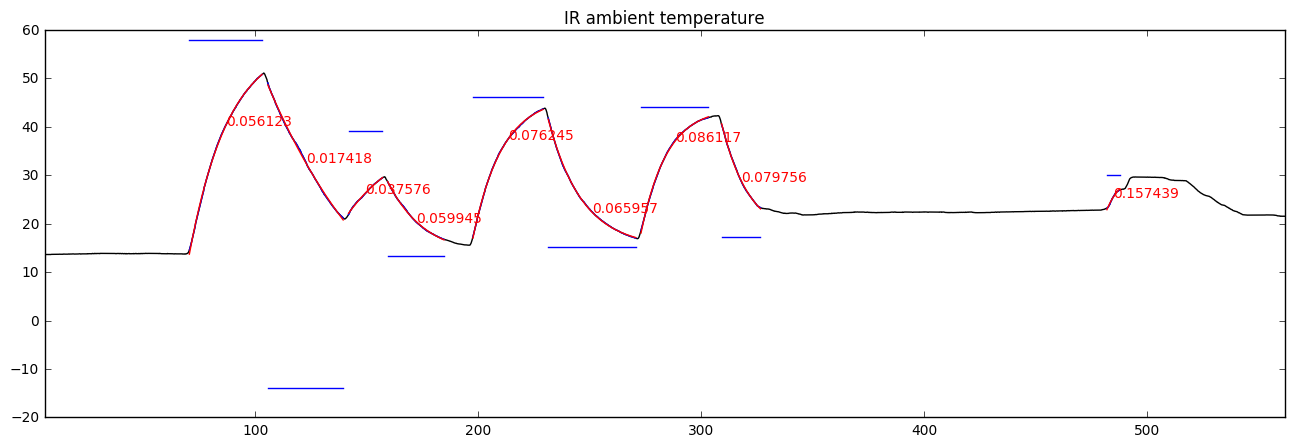

In [239]:
# we list the exponential decay values and plot the limit ceiling of each curve so you know if it makes sense

plt.figure(figsize=(16,5))
tT = pI.tIA
tT.plot(color="black", title="IR ambient temperature")
for pps in slicechanges(tT, 5, 0.1, 3):
    res = expcurvefitplot(pps)


0.0431977640384 45.4984038593 err 0.0265388886714 Optimization terminated successfully.
0.0276131284772 5.71475607267 err 0.0182165917202 Optimization terminated successfully.
0.0195416983231 49.6337730273 err 0.0428252839774 Maximum number of iterations has been exceeded.
0.0179900969689 -9.02166576387 err 0.0321441381455 Maximum number of iterations has been exceeded.
0.143447975815 28.4266219277 err 0.0136748767443 Optimization terminated successfully.
0.131273065089 19.9604769187 err 0.0171593295917 Optimization terminated successfully.
0.135428000699 33.2696985179 err 0.00925702149965 Optimization terminated successfully.
0.135065953047 19.2217147885 err 0.00919766952487 Optimization terminated successfully.


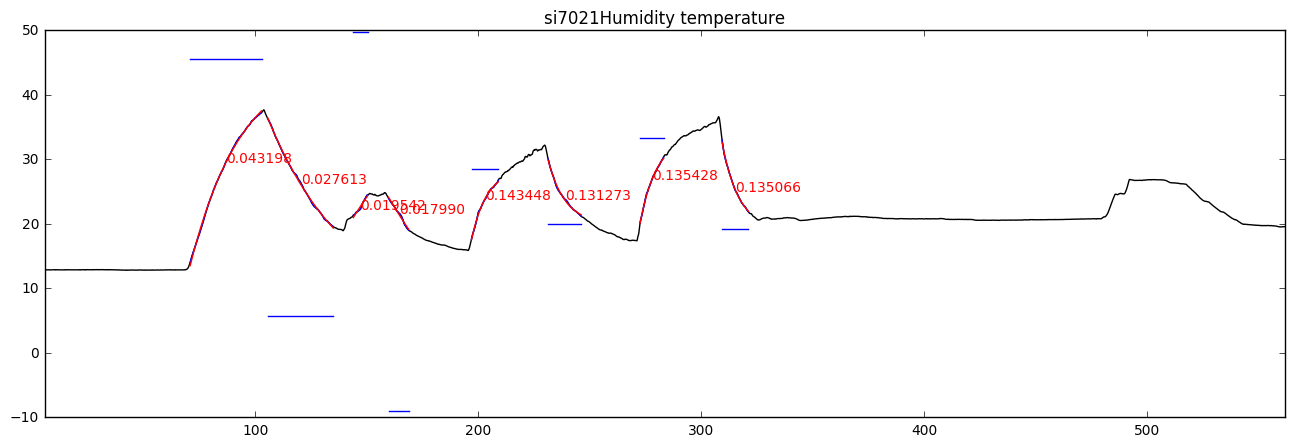

In [240]:
plt.figure(figsize=(16,5))
tT = pG.tG
tT.plot(color="black", title="si7021Humidity temperature")
for pps in slicechanges(tT, 5, 0.2, 3):
    res = expcurvefitplot(pps)


0.0776075758336 51.6370411935 err 0.0120926316019 Optimization terminated successfully.
0.0264551753076 0.767104280375 err 0.119963445135 Optimization terminated successfully.
0.101173202022 28.2160110271 err 0.00427547449263 Optimization terminated successfully.
0.0772851246163 14.9313425334 err 0.00620674928954 Optimization terminated successfully.
0.0703091473873 40.2129225407 err 0.0106478348797 Optimization terminated successfully.
0.0690579992766 15.3576749686 err 0.0125000661722 Optimization terminated successfully.
0.0761875054887 38.0932269416 err 0.0116252458542 Optimization terminated successfully.
0.060021476753 12.8574283804 err 0.017955641159 Optimization terminated successfully.
0.342846190942 29.7819670246 err 0.00553707138441 Optimization terminated successfully.


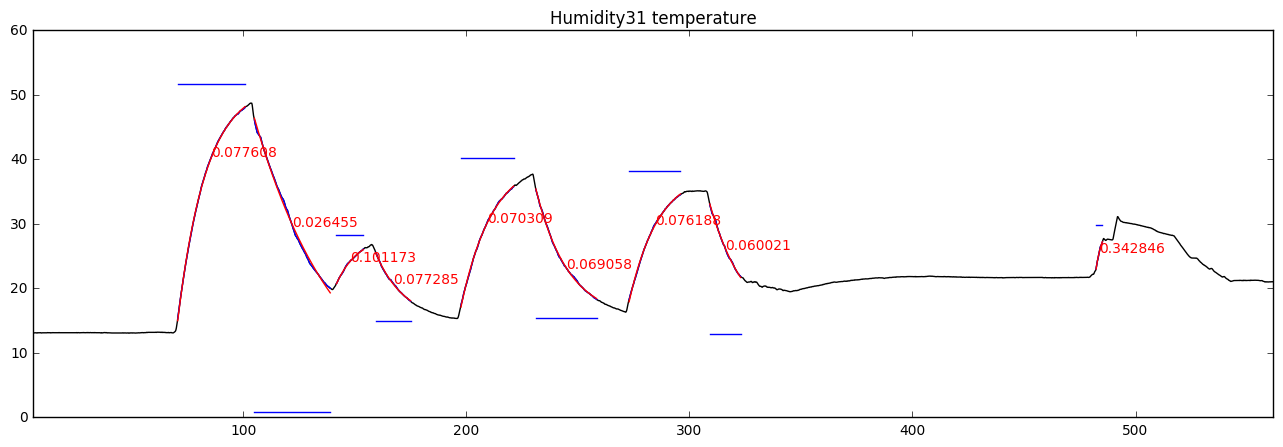

In [241]:
plt.figure(figsize=(16,5))
tT = pS.tS
tT.plot(color="black", title="Humidity31 temperature")
for pps in slicechanges(tT, 5, 0.2, 3):
    res = expcurvefitplot(pps)


In [203]:
decaypersec = 0.078
print("halflife", -log(0.5)/0.078)

halflife 8.886502314871093


In [253]:
fb, ft = 90000, 30
gamma = 1.4
fb**(1-gamma) * (ft+273.16)**gamma


31.09164168008537